In [ ]:
Lab 4

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [2]:
#first, we need to import all the bias frames. here, we took 10 frames of bias, along with 10 frames (each)
#of the flat-field lamp at three different brightness settings-- 60, 121, and 242, as well as 10 dark frames.
#This block, and these blocks below,are just importing all 10 of each of them, so we can take the mean of
#the ten bias frames and subtract it from our lamp frames to "correct" them.
bias = []
for i in range (1,11):
    bias.append(fits.getdata("Bias-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [3]:
lamp60 = []
for i in range (1,11):
    lamp60.append(fits.getdata("Lamp60-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [4]:
lamp121 = []
for i in range (1,11):
    lamp121.append(fits.getdata("Lamp121-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [5]:
lamp242 = []
for i in range (1,11):
    lamp242.append(fits.getdata("Lamp242-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [6]:
dark = []
for i in range (1,11):
    dark.append(fits.getdata("Dark-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [7]:
#here, i'm just defining names and making them arrays so we can take the mean bias frame and correct the lamp frames.
#thanks numpy
bias = np.asarray(bias)
lamp60 = np.asarray(lamp60)
lamp121 = np.asarray(lamp121)
lamp242 = np.asarray(lamp242)
dark = np.asarray(dark)

In [8]:
#beginning in this frame, and going through the next two, is the actual process for correcting the lamp frames.
#to correct them, we simply subtract the mean bias frame from each lamp frame. this should eliminate the background
#noise and give us our true lamp frames. we can take the mean (and variance of each mean) and plot them against each
#other to try and determine the gain. the mean is much smaller than the variance, so we expect the gain to be 
#less than one electron per ADU. as for my naming convention-- "clamp" is a contraction of "corrected lamp".
biasmean = bias.mean(axis=0)
clamp60 = (lamp60 - biasmean)
print(clamp60.mean())
clamp60var = clamp60.var(axis=0)
clamp60var.mean()

1926.0478603086494


4067.5900097642957

In [9]:
clamp121 = (lamp121 - biasmean) #step 1-- correct the frame
print(clamp121.mean())
clamp121var = clamp121.var(axis=0) #step 2-- take the variance
clamp121var.mean() #step 3-- take the mean of the variance
#now we have to do this for all of our frames

9371.133222238283


19169.588255619637

In [10]:
clamp242 = (lamp242 - biasmean)
print(clamp242.mean())
clamp242var = clamp242.var(axis=0)
clamp242var.mean()

27898.666591805406


56629.258027756914

our estimate for the gain, in electrons per ADU, is: 0.49422443888088546


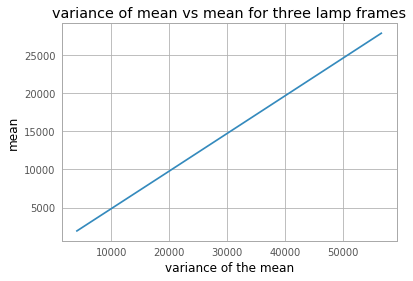

our readnoise, in electrons, is: 9.605652930674532
another estimate for our readnoise: 9.593348217411982


In [36]:
#here, we define a function that's supposed to be an educated guess as to what the actual relationship should resemble
#in this case, it's linear (at least, we expect it to be). we give our educated guesses as to the values of the 
#slope and the y-intercept-- the slope should be our gain.
def func0 (m,x,b):
    return m*x+b
plt.title('variance of mean vs mean for three lamp frames')
plt.xlabel('variance of the mean')
plt.ylabel('mean')
m0,b0 = (0.5,0)
#our x-axis is variance of the mean, while our y-axis is just the mean. to actually pull the coefficients of the fit 
#line, we use the coeffs function to make a curve fit for the data, then ask python nicely to tell us the slope of
#the line.
xvals = [clamp60var.mean(),clamp121var.mean(),clamp242var.mean()]
yvals = [clamp60.mean(),clamp121.mean(),clamp242.mean()]
coeffs, filterr = curve_fit(func0, xvals, yvals, p0=(m0,b0))
print('our estimate for the gain, in electrons per ADU, is:',coeffs[0])
#we could've just plotted xvals and yvals, but seeing the order they're in and their pairs here was helpful to me.
#we now know what the gain is-- about 0.5 electrons/ADU. we can't split electrons in half, so this just means
#that on average, one electron registers as two ADU. 
plt.plot([clamp60var.mean(),clamp121var.mean(),clamp242var.mean()],[clamp60.mean(),clamp121.mean(),clamp242.mean()])
plt.show()
rn = coeffs[0]*bias.std(axis=0).mean()
print('our readnoise, in electrons, is:',rn)
#here, we pull out the readnoise from the data. the readnoise is the standard deviation of a bunch of measurements of
#the same "packet" area on the CCD. about 9 or 10 electrons isn't too bad of a readnoise here. 
gain = 0.49422443888088546
rn2 = (abs(coeffs[1]))**(1/2)
print('another estimate for our readnoise:', rn2)
#the other method to get the readnoise is right above-- taking the square root of the y-intercept should also be 
#an estimate of the readnoise. the unit is still in electrons. also, the actual y-intercept for this fit is 
#negative, so we take the square root of the absolute value of the y-intercept. the two values are quite close to 
#each other, so we have a pretty good estimate for the readnoise here. 

In [12]:
part 2: dark current

SyntaxError: invalid syntax (<ipython-input-12-cafbe1ab03a4>, line 1)

In [13]:
#here, we're doing essentially the same thing as before-- importing our 20 new bias frames (for the second part of the
#experiment) and getting them ready to take the mean bias frame to correct our new dark frames.
bias2 = []
for i in range (1,21):
    bias2.append(fits.getdata("Bias2-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [38]:
#here, the first two lines are importing our own data, and the last 6 are from three other groups in the lab 
#section. getting them all ready to become arrays, and eventually, to correct them. it's important to note here that
#we're using our bias frames to correct these, not the original groups'. it shouldn't matter, in the end, as it's just
#random noise, but it's good to keep in mind. 
ccd1 = fits.getdata("CCD Image 1.fit")
ccd2 = fits.getdata("CCD Image 2.fit")
ccd3 = fits.getdata("GroupBDarkT6Exp300.fit")
ccd4 = fits.getdata("GroupBDarkT9Exp600.fit")
ccd5 = fits.getdata("GroupCDarkT7.1Exp400.fit")
ccd6 = fits.getdata("GroupCDarkT9.4Exp300.fit")
ccd7 = fits.getdata("GroupDDarkT7Exp600.fit")
ccd8 = fits.getdata("GroupDDarkT9.4Exp300.fit")
ccd9 = fits.getdata("DarkT6exp600-0001.fit")
ccd10 = fits.getdata("DarkT9exp600-0001.fit")
ccd11 = fits.getdata("GroupAADark_Day_2_6cexp900-0001.fit")
ccd12 = fits.getdata("GroupAADark_Day_2_9cexp300-0001.fit")
ccd13 = fits.getdata("GroupBBDarkT7Exp400.fit")
ccd14 = fits.getdata("GroupBBDarkT8Exp400.fit")
#i downloaded all the frames into the same direcotory as this program. this means that we don't have to call a folder
#in particular, but python recognizes them as being in the same directory, so we can just call them by name. our frame
#names changed since i called these, so they're named differently in the shared google drive. but they're all saved
#locally for me.. i can't guarantee you'll have the same luck. 
#units of dark current rate-- electrons per time.

In [39]:
#the dirty work-- making each of these frames into arrays and calculating our mean bias frame for correction. real
#thrilling stuff here.
bias2 = np.asarray(bias2)
ccd1 = np.asarray(ccd1)
ccd2 = np.asarray(ccd2)
ccd3 = np.asarray(ccd3)
ccd4 = np.asarray(ccd4)
ccd5 = np.asarray(ccd5)
ccd6 = np.asarray(ccd6)
ccd7 = np.asarray(ccd7)
ccd8 = np.asarray(ccd8)
ccd9 = np.asarray(ccd9)
ccd10 = np.asarray(ccd10)
ccd11 = np.asarray(ccd11)
ccd12 = np.asarray(ccd12)
ccd13 = np.asarray(ccd13)
ccd14 = np.asarray(ccd14)
bias2mean = bias2.mean(axis = 0)
#next up, we need to do a few things for each dark frame. first, we need to corrext the dark frame with our mean bias
#frame. next, we need to determine the median of the dark current in the array-- this gives us an average value as a 
#single number, so we can divide by exposure time and get a single number back-- the dark current count rate (per
#second) and compare them. even with very different median counts, they should have a linear relationship once we
#divide by exposure time, but we'll see if that's true or not later on. 

In [40]:
#for a 300s exposure at ~8.9C ~282.05K
dc1 = (ccd1 - bias2mean) #step 1-- correct the dark frames
dc1median = np.median(dc1) #step 2-- take the median of the dark frame 
exposuretime1 = 300 #seconds #step 3-- figure out your exposure time
print(dc1median)
dc1rate = dc1median / exposuretime1 #step 4-- define the rate as dark current count per time
print(dc1rate)
#now we have both the median dark current and the rate of dark current. we only care about the rate here, so we can
#effectively ignore the first printed value-- just a sanity check. units of dark current is electron counts / time.
#now we do this for all of the other frames. exposure times and ccd temperature are labeled at the top of
#each block, and the steps of finding dark current rate are labeled above, but are the same for each block.

68.0
0.22666666666666666


In [41]:
#for a 450s exposure at ~4.6C ~277.75K
dc2 = (ccd2 - bias2mean)
dc2median = np.median(dc2)
exposuretime2 = 450 #seconds
print(dc2median)
dc2rate = dc2median / exposuretime2
print(dc2rate)

76.70000000000005
0.17044444444444454


In [42]:
#for a 300s exposure at ~6C ~279.15K
dc3 = (ccd3 - bias2mean)
dc3median = np.median(dc3)
exposuretime3 = 300 #seconds
print(dc3median)
dc3rate = dc3median / exposuretime3
print(dc3rate)

54.85000000000002
0.1828333333333334


In [43]:
#for a 600s exposure at ~9C ~282.15K
dc4 = (ccd4 - bias2mean)
dc4median = np.median(dc4)
exposuretime4 = 600 #seconds
print(dc4median)
dc4rate = dc4median / exposuretime4
print(dc4rate)

135.25
0.22541666666666665


In [44]:
#for a 400s exposure at ~7.1C ~280.25K
dc5 = (ccd5 - bias2mean)
dc5median = np.median(dc5)
exposuretime5 = 400 #seconds
print(dc5median)
dc5rate = dc5median / exposuretime5
print(dc5rate)

75.79999999999995
0.1894999999999999


In [45]:
#for a 300s exposure at ~9.4C ~282.55K
dc6 = (ccd6 - bias2mean)
dc6median = np.median(dc6)
exposuretime6 = 300 #seconds
print(dc6median)
dc6rate = dc6median / exposuretime6
print(dc6rate)

68.75
0.22916666666666666


In [46]:
#for a 600s exposure at ~7C ~280.15K
dc7 = (ccd7 - bias2mean)
dc7median = np.median(dc7)
exposuretime7 = 600 #seconds
print(dc7median)
dc7rate = dc7median / exposuretime7
print(dc7rate)

107.35000000000002
0.1789166666666667


In [47]:
#for a 300s exposure at ~9.4C ~282.55K
dc8 = (ccd8 - bias2mean)
dc8median = np.median(dc8)
exposuretime8 = 300 #seconds
print(dc8median)
dc8rate = dc8median / exposuretime8
print(dc8rate)

65.64999999999998
0.21883333333333327


In [48]:
#for a 600s exposure at ~6C ~279.15K
dc9 = (ccd9 - bias2mean)
dc9median = np.median(dc9)
exposuretime9 = 600 #seconds
print(dc9median)
dc9rate = dc9median / exposuretime9
print(dc9rate)

96.25
0.16041666666666668


In [49]:
#for a 600s exposure at ~9C ~282.15K
dc10 = (ccd10 - bias2mean)
dc10median = np.median(dc10)
exposuretime10 = 600 #seconds
print(dc10median)
dc10rate = dc10median / exposuretime10
print(dc10rate)

126.54999999999995
0.21091666666666659


In [50]:
#for a 900s exposure at ~6C ~279.15K
dc11 = (ccd11 - bias2mean)
dc11median = np.median(dc11)
exposuretime11 = 900 #seconds
print(dc11median)
dc11rate = dc11median / exposuretime11
print(dc11rate)

155.70000000000005
0.17300000000000004


In [51]:
#for a 300s exposure at ~9C ~282.15K
dc12 = (ccd12 - bias2mean)
dc12median = np.median(dc12)
exposuretime12 = 300 #seconds
print(dc12median)
dc12rate = dc12median / exposuretime12
print(dc12rate)

67.54999999999995
0.22516666666666652


In [52]:
#for a 400s exposure at ~7C ~280.15K
dc13 = (ccd13 - bias2mean)
dc13median = np.median(dc13)
exposuretime13 = 400 #seconds
print(dc13median)
dc13rate = dc13median / exposuretime13
print(dc13rate)

69.75
0.174375


In [53]:
#for a 400s exposure at ~8C ~281.15K
dc14 = (ccd14 - bias2mean)
dc14median = np.median(dc14)
exposuretime14 = 400 #seconds
print(dc14median)
dc14rate = dc14median / exposuretime14
print(dc14rate)

73.75
0.184375


In [54]:
#remembering part one, we define a new function to guess what the relationship between ccd temperature and dark 
#current rate should be. it's given to us in the lab instructions, and is shown below.
def func1 (x,e,a):
    return a*x**(1.5)*np.exp(-e/(2*x*(8.617*10**-5)))
e0,a0 = (1,130)
#e0 and a0 are our "educated guesses" for what we expect the two values to be. it's just giving python a reasonable 
#range to look for. we know the bandgap energy for silicon (what we have in our ccd) to be to be about 1.14 eV, so 
#we'll guess about 1. the y-intercept is inconsequential, so we don't really care about it. 
xvals = (277.75, 279.15, 279.15, 279.15, 280.15, 280.15, 280.25, 281.15, 282.5, 282.15, 282.15, 282.15, 282.55, 282.55)
yvals = ((dc2rate, dc3rate, dc9rate, dc11rate, dc7rate, dc13rate, dc5rate, dc14rate, dc4rate, dc1rate, dc10rate, dc12rate, dc6rate, dc8rate))
#we have to order the temperatures from least to greatest so it draws the line fit right. the group data is out of 
#order, but as long as the line fit isn't jumping around, it should be pretty accurate. we'll see if the graph looks
#right in the next block.

In [55]:
#first, let's name the axes and give this graph a name. the names are pretty self-explanatory. now, we need to find
#out the coefficients of the fit line-- the slope is the bandgap energy. 
plt.title('temperature of ccd vs. dark current rate (in seconds)')
plt.xlabel('ccd temperature (K)')
plt.ylabel('electron counts per second')
#this is just using the coeffs function of the curve_fit to estimate the values. there are two plots we want to show
#down here are the scatter plot of our actual points and the curve fit. then, we print the coefficent for the slope
#and see if it's a decent estimate of the bandgap energy for silicon. 
coeffs, filterr = curve_fit(func1, xvals, yvals, p0=(e0,a0))
plt.scatter(xvals,yvals)
plt.plot(xvals, func1(np.array(xvals),*coeffs))
plt.show()
print('our experimental bandgap energy, in eV, is:', coeffs[0])
#the bandgap energy for silicon is ~1.14, so we're pretty close! not too bad. 

our experimental bandgap energy, in eV, is: 0.9523634322612252
